# Visualize regression coefficients with `coefplot`

[Svensk version](../sv/coefplot_sv.html) | [Front page](../index_en.html)

Tables can show a lot of information, but that information might be hard to grasp intuitively. Preferably, we want to present results as simply as possible, so that our readers don't have to put in effort to understand what we are trying to communicate.

This is especially true for regression analysis. If they become too packed with coefficients many people will simply scan them for significance stars, which is unfortunate. A onsequence is that we don't pay attention to coefficients that are estimated precisely around zero, and coefficients estimated at some large value, with big uncerstainty - both will be insignificant.

More and more are therefore electing to show regression coefficients graphically, with confidence intervals. The graphs make comparisons easy, they show what is significant (the confidence intervals do not cover zero) and the degree of uncertainty (the width of the intervals).

By default, Stata shows the end points of the confidence intervals in the regression tables, but there is also a nice user built command that lets us do an informative graph. It is called `coefplot`.

In this guide we will cover how to make a coefficient plot with `coefplot`, and also how to make it show standardized regression coefficients.

## Installing `coefplot`

Since the command is user generated we first need to insetall `coefplot`. We do that by writing:

In [3]:
ssc install coefplot, replace

checking coefplot consistency and verifying not already installed...
all files already exist and are up to date.


## A regression analysis with a few variables

We then load the QoG data to have something to work with:

In [1]:
use "https://www.qogdata.pol.gu.se/dataarchive/qog_bas_cs_jan18.dta", clear

(Quality of Government Basic dataset 2018 - Cross-Section)


We will run a regression analysis where the level of corruption (ti_cip - coded so that higher values mean less corruption) is the dependent variable, and the level of democracy (p_polity2), GDP per capita (gle_rgdpc), distance from the equator (lp_lat_abst) and the level of ethnic fragmentation (al_ethnic) are independent variables.

In [2]:
reg ti_cpi p_polity2 gle_rgdpc lp_lat_abst al_ethnic


      Source |       SS           df       MS      Number of obs   =       133
-------------+----------------------------------   F(4, 128)       =     62.20
       Model |  35203.5053         4  8800.87633   Prob > F        =    0.0000
    Residual |  18112.0135       128  141.500105   R-squared       =    0.6603
-------------+----------------------------------   Adj R-squared   =    0.6497
       Total |  53315.5188       132  403.905445   Root MSE        =    11.895

------------------------------------------------------------------------------
      ti_cpi |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
   p_polity2 |   .7902483   .1782931     4.43   0.000     .4374649    1.143032
   gle_rgdpc |    .000788   .0000843     9.35   0.000     .0006212    .0009547
 lp_lat_abst |   19.94143   8.250433     2.42   0.017     3.616537    36.26632
   al_ethnic |  -5.225239   4.711059    -1.11   0.

The variables have various effects: the level of democracy (p_polity2), economic development (gle_rgdpc) and distance from the equator (lp_lat_abst) all have a positive coefficiet, and are statisticall significant (the p-values are below 0.05). Ethnic fragmentation (al_ethnic) has a negative effect, which means that more ethnic fragmentation is associated with more corruption. Remember that higher values on "ti_cpi" means less corruption. The ethnic fragmentation variable is however not significant (since the p-value is above 0.05).

## Visualize unstandardized coefficents with `coefplot`

Now we are going to make a coefficient plot. It is simple: After running a regression analysis, we just type `coefplot`. We will also immediately add an option that draws a line at the 0 on the x axis, `xline(0)`. All coefficients whose confidence interval (marked by the horizontal lines) does not touch the zero line are significant.

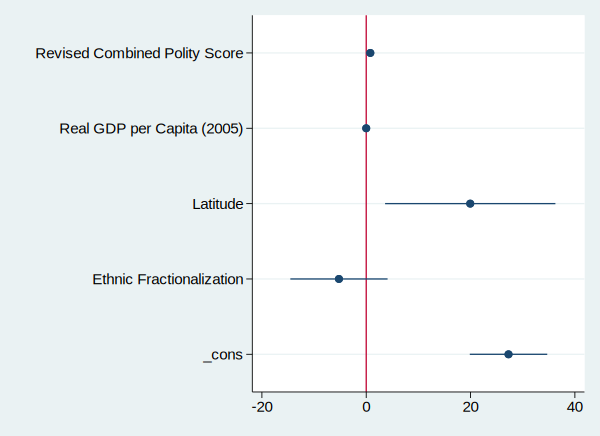

In [3]:
coefplot, xline(0)

Very simple! Here we can now see graphically the numbers in the above table. The coefficient for latitude is on the right side of the line, close to 20 (it was 19.9) in the table, and as the confidence interval does not touch the red line, the coefficient is significant. Ethnic fragmentation is to the left, meaning that the coefficient is negative. The confidence interval however covers the red zero line, which means that the coefficient is not significant.

**But when it comes to democracy (Revised Combined Polity Score) and GDP per capita, we don't see any confidence intervals, and it appears as if the dots are on the zero line. Still, we could in the table see that the coefficients were significant. Why is that?**

It simply indicates that the coefficients and associated confidence intervals are very small, compared to the other variables. GDP is for instance measured in the number of dollars per capita. And it is only logical that the level of corruption remains virtually unchanged if we raise the GDP per capita with a single dollar. The coefficient is 0.0008, and the confidence interval runs between 0.0006 and 0.0009. The scale is completely different than the one for ethnic fragmentation, where the variable only runs between 0 and 1.

In order to make a fair visual comparison we need to standardize the variables.

## Center and standardize regression coefficients (and variables) with `center`

To standardize the coefficients means to give them a common point of reference, so that they will become more comparable. One way to do so is by transforming the coefficients so that they show how much the level of corruption would change if the variable increased by one *standard deviation*. The standard deviation can be seen as a measure of "typical variation" in the variable.

To take an example: The average height of 18 year old men in Sweden is just above 180 cm, with a standard deviation of 7 cm. About two-thirds of the population can be found within 7 cm above and below 180 cm. The average weight is about 71 kilograms, with a standard deviation of 10 kilo.

If we rescale the independent variables so that all have a mean value of zero, and a standarddeviation of 1, and then enter them into the regression analysis, the coefficients will show what happens with the dependent variable when we increase the independent variable with one standard deviation. We do so by subtracting the mean from each variable, and then divide by the standard deviation.

Stata has a ready-made command to do just that, `center`. We then type `center` and the variables we want to transform. We also add two options, `standardize` and `prefix(std_)`. The first option tells Stata that we want to standardize the variables (turning the standard deviation into 1), otherwise they will just get the average set to 0. The second option tells Stata that we want to create new variables, with the prefix "std_". "gle_rgdpc" is thus turned into a new variable called "std_gle_rgdpc".

We actually don't need to set the mean to zero in order to standardize the coefficients, but that is done automatically with this handy command, so we will do so now.

In [4]:
center p_polity2 gle_rgdpc lp_lat_abst al_ethnic, standardize prefix(std_)

(generated variables: std_p_polity2 std_gle_rgdpc std_lp_lat_abst std_al_ethnic)


If we now compare an untransformed variable with its transformed counterpart we can make sure that it turned out right:

In [5]:
sum p_polity2 std_p_polity2


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
   p_polity2 |        165    4.072727    6.158044        -10         10
std_p_poli~2 |        165    5.13e-09           1  -2.285259   .9625252


"p_polity2" used to have a mean of 4.07, and a standard deviation of 6.16. The scale ran from -10 to +10. The new variable has the mean 0 (Stata says that the mean is 0.00000000513, but it is basically a rounding error). The standard deviation is 1, and the scale now runs from -2.29 to 0.96. Less intuitive in most contexts, but it will make our coefficient plot easier to read.

## Coefficient plot with standardized variables

We can now redo the analysis with the standardized variables, and then visualize them with `coefplot`.

In [6]:
reg ti_cpi std_p_polity2 std_gle_rgdpc std_lp_lat_abst std_al_ethnic


      Source |       SS           df       MS      Number of obs   =       133
-------------+----------------------------------   F(4, 128)       =     62.20
       Model |  35203.5051         4  8800.87628   Prob > F        =    0.0000
    Residual |  18112.0137       128  141.500107   R-squared       =    0.6603
-------------+----------------------------------   Adj R-squared   =    0.6497
       Total |  53315.5188       132  403.905445   Root MSE        =    11.895

---------------------------------------------------------------------------------
         ti_cpi |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
----------------+----------------------------------------------------------------
  std_p_polity2 |   4.866384   1.097937     4.43   0.000     2.693928    7.038839
  std_gle_rgdpc |   12.45253   1.331904     9.35   0.000      9.81713    15.08793
std_lp_lat_abst |   3.602087   1.490303     2.42   0.017     .6532673    6.550907
  std_al_ethnic |  -1.342559   1

The variables are now easier to compare. The direction of the relationships - if they are positive or negative - are of course the same as in the previous table. The same holds for significance values. The only things that have changed are the coefficients, the standard errors, and the confidence intervals.

Now we can plot these coefficients with `coefplot`, and also add an option to remove the intercept (cons) from the graph. The intercept shows the expected value on the dependent variable when all the independent variables are zero, which in this case means that the country has average values on all the independent variables. We however want to focus the graph on the more theoretically relevant variables. We remove the interecpt with `drop(_cons)`. The same option can also be used to drop other coefficients.

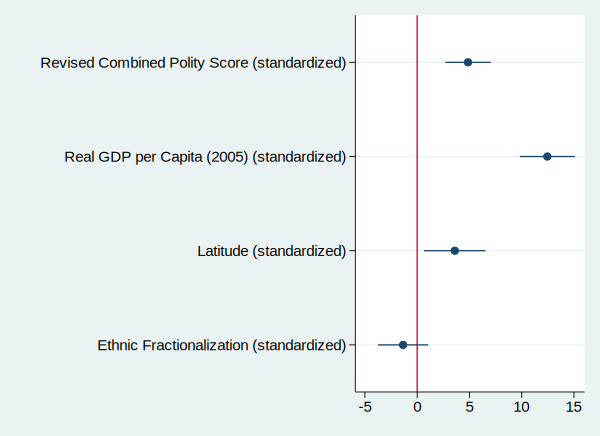

In [7]:
coefplot, xline(0) drop(_cons)

In contrast to the previous version of the graph we can now see that the effect of GDP per capita is strong and clearly significant. It was only the small scale of the variable that made it appear so close to zero in the previous graph. In fact, GDP has the clearest effect of all variables, in this standardized comparison. Democracy, GDP per capita and Latitude (measured as distance from the equator) are all positive and significant, while ethnic fractionalization is negative and insignificant.

## Multiple regression models in one graph

We can also construct a graph that shows multiple regression models at the same time. We first run all our analyses and store the results with `estimates store modelname` and then include them in the graph with `coefplot modelname1 modelname2`. Below we run two analyses, first with only democrayc, and then with all independent variables, saving them as "m1" and "m2". To not clog the page with output I have here typed `quietly` ahead of the regression commands.

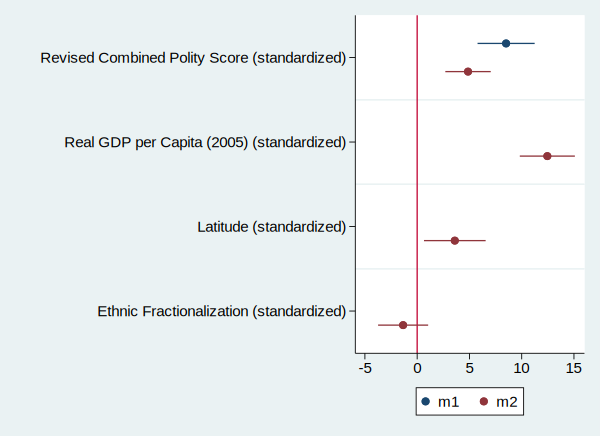

In [8]:
quietly reg ti_cpi std_p_polity2
estimates store m1

quietly reg ti_cpi std_p_polity2 std_gle_rgdpc std_lp_lat_abst std_al_ethnic
estimates store m2

coefplot m1 m2, xline(0) drop(_cons)

The coefficients from model 1 ("m1") are displayed in blue color. It is only one - the level of democracy. Coefficients from the second model ("m2") are presented in red color. We can see that the effect of democracy is diminished when we add the other controls - the dot is moved closer to the zero line. 

## Export the graph to .png or .pdf

While the graph still is open in Stata we can type `graph export` to save the graph as an image or pdf file. We can then easily insert it into a Word document or publish it on the web.

In [9]:
graph export "coefplot_ticpi.pdf", replace

(file coefplot_ticpi.pdf written in PDF format)


## Conclusion

If you have many variables it might be a good idea to use the option `keep()` to focus on specific coefficients, for instance in several models. Then the reader can see how the effect of one main variable is changed when we control for various other vairables.

There are a lot of other options we can add to make the graph look better, or to display various models in different ways - check out `help coefplot` to see it all. [A much more elaborate guide than this one](http://repec.sowi.unibe.ch/stata/coefplot/getting-started.html) is also provided by the author of the command.

[Tables](esttab_en.html) can still be a good way to present the results of regression analyses, especially if there are not too many variables. Many scientific journals however now encourage authors to use graphs to present results of this type, so it is in all cases a good idea to know how to create and read them.